# General styling of 3D visualisations

This notebook shows you how to change the general style of your plotting, including the size of the plot, colors, and the point of view. As the 3D tool is built around the fantastic [PyVista package](https://docs.pyvista.org/version/stable/), many things shown here can be further adapted following the links to the PyVista documentation provided throughout this notebook.

For all options we change here, we also defined a set of default values. You can have a look at these default values by calling `viz.example_arg_default` to get a first overview of available options. For a more comprehensive overview use the link list provided below.

A general remark: all options presented here can be changed on the fly by providing the kwargs when calling, for example, `.plot_year()`, or you can provide them directly during the creation of the 3D object. Everything that is not provided falls back to the default values. This approach was intended to make it easy to play around while searching for your best setting, and once you found it, you can define it during creation of the 3D-object to make the following code of creation animations or plots easier.

## PyVista documentation overview

Throughout this notebook, we are referring to the PyVista documentation for getting an overview of which options are available for customization. Here, we provide a link collection to the PyVista documentation for recurring OGGM:3D-Viz users:

- `plotter_args`: [PyVista plotter documentation](https://docs.pyvista.org/version/stable/api/plotting/_autosummary/pyvista.plotter)
- `add_mesh_ice_thick_args`: [PyVista add mesh documentation](https://docs.pyvista.org/version/stable/api/plotting/_autosummary/pyvista.plotter.add_mesh)
- `add_mesh_topo_args`: [PyVista add mesh documentation](https://docs.pyvista.org/version/stable/api/plotting/_autosummary/pyvista.plotter.add_mesh)
- `camera_args`: [PyVista camera documentation](https://docs.pyvista.org/version/stable/api/core/camera.html)
- `light_args`: [PyVista light documentation](https://docs.pyvista.org/version/stable/api/core/_autosummary/pyvista.light)
- `background_args`: [PyVista plotter set background documentation](https://docs.pyvista.org/version/stable/api/plotting/_autosummary/pyvista.plotter.set_background)
- `text_time_args`: [PyVista plotter add text documentation](https://docs.pyvista.org/version/stable/api/plotting/_autosummary/pyvista.plotter.add_text)

More information about these options is provided throughout this notebook.

## Open data and create 3D object

In [1]:
import xarray as xr
from glacier3dviz.tools import Glacier3DViz

ds_glacier = xr.open_dataset("constant_climate_dummy_data.nc")

viz = Glacier3DViz(
    ds_glacier,  # the dataset for visualisation
    camera_args={  # arguments for the point of view
        'azimuth': -135, # rotate the map around the z-axis
        'elevation': 20,  # set the elevation above ground of the point of view
    }
)

## Plotter arguments (e.g. window_size)

The general visualization is made using a plotter, which can be customized using different arguments. For example, we can define the window_size of the final plot. For more options, check out the [documentation of pyvista.plotter](https://docs.pyvista.org/version/stable/api/plotting/_autosummary/pyvista.plotter).

In [ ]:
# have a look at the default settings
viz.plotter_args_default

In [ ]:
# define a new wineow_size for the resulting plot
plotter_args_new = {'window_size': [650, 400]}

viz.plot_year(2050,
              plotter_args=plotter_args_new)

By changing the window size you probably also need to adapt the position of the colobars. How to do this is explained below.

## Ice Thickness color & colorbar

Here we show how to change the colors and style of the ice thickness and how to adapt the corresponding colorbar. For more options check the [PyVista documentation for adding a mesh](https://docs.pyvista.org/version/stable/api/plotting/_autosummary/pyvista.plotter.add_mesh).

In [ ]:
# have a look at the default values
viz.add_mesh_ice_thick_args_default

In [ ]:
add_mesh_ice_thick_args_new = {
    'cmap' : 'viridis',  # use a different matplotlib cmap
    'scalar_bar_args': {  # some arguments for the colorbar
        'position_x': 0.1,  # set x_position of colorbar
        'title': 'Ice Thick',  # change th tiles
    }
}

viz.plot_year(2040,
              add_mesh_ice_thick_args=add_mesh_ice_thick_args_new)

## Bed topography color and colorbar

If you like to adapt the styling of the bed topography, here you can find an example how this can be done. However, you can also try out using satellite data for the coloring of the topography, explained in the next section. And as always have a look at the [PyVista documentation](https://docs.pyvista.org/version/stable/api/plotting/_autosummary/pyvista.plotter.add_mesh) for more options.

In [ ]:
# have a look at the defaults
viz.add_mesh_topo_args_default

In [ ]:
add_mesh_topo_args_new = {
    'cmap': 'cividis',
    'scalar_bar_args': {
        'position_x': 0.8,
    }
}

viz.plot_year(2050,
              add_mesh_topo_args=add_mesh_topo_args_new)

## Bed topography texture from satellites

A nice addition of OGGM:3D-Viz is that you can use bed topography from satellite data. However, currently this is only possible for a relative 'small' region, but we are working on a fix for this. Note, that for this we need to download some data and this might take some time. Once you have downloaded the data for your glacier and are adapting the styling further you can rely on the cached satellite data.

In [2]:
viz_satellite = Glacier3DViz(
    ds_glacier.isel(  # the dataset for visualisation, here we select a smaller extent
        x=slice(120, 355),
        y=slice(120, 340)),
    use_texture=True,  # decide to use background map (satellite imagery) for texture on the topography
    camera_args={  # arguments for the point of view
        'azimuth': -135, # rotate the map aroung the z-axis
        'elevation': 20,  # set the elevation above ground of the point of view
    }
)

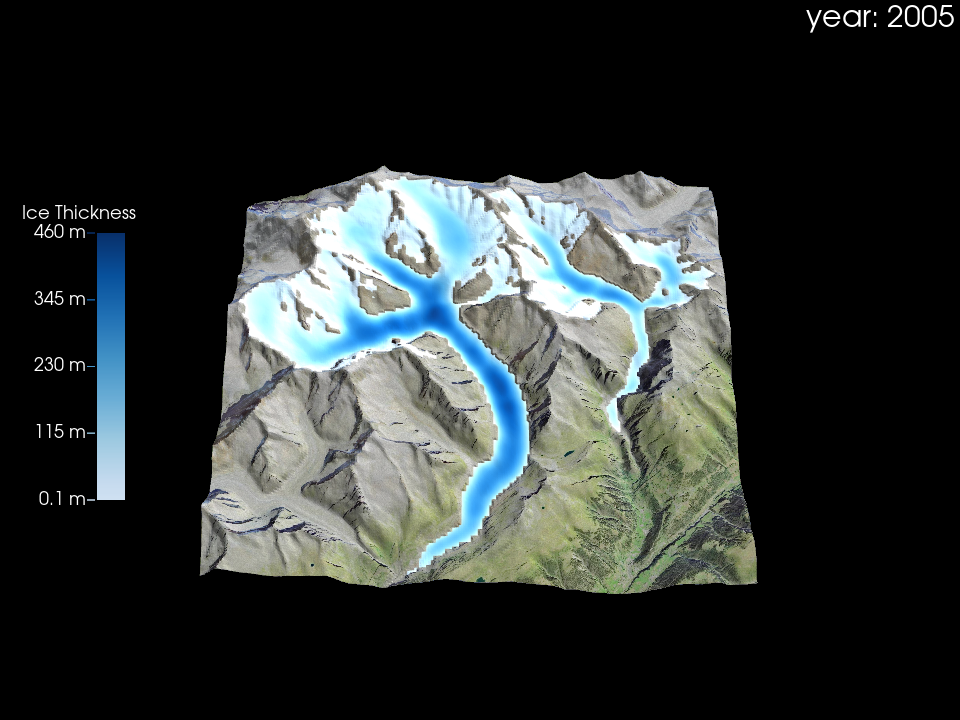

In [3]:
viz_satellite.plot_year(2050)

## Change point of view

We already changed the camera position in the default initialisation of `viz` above. However, here once again explicitly showing some options, for more options checkout the [PyVista documentation](https://docs.pyvista.org/version/stable/api/core/camera.html).

In [ ]:
# have a look at the defaults, we set during initialisation of viz
viz.camera_args_default

In [ ]:
camera_args_new = {
    'azimuth': -80,
    'elevation': 50,
    'zoom': 2.5,
}

viz.plot_year(2050,
              camera_args=camera_args_new)

## Lighting

The lighting of the plot can be important depending on your point of view and on the features you want to highlight in your visualisaitons. A comprehensive list of posibilities can be found in the [lightning documentation of PyVista](https://docs.pyvista.org/version/stable/api/core/_autosummary/pyvista.light).

In [ ]:
# have a look at the defaults
viz.light_args_default

In [ ]:
light_args_new = {
    'color': 'red'
}

viz.plot_year(2050,
              light_args=light_args_new,
             )

## Background color

You might want to change the look of the background. By default it shows a gradual shift from white to lightblue, from bottom to top. However, you can set it as you wish, following the available options of the [set_background documentation of pyvista](https://docs.pyvista.org/version/stable/api/plotting/_autosummary/pyvista.plotter.set_background).

In [ ]:
# have a look at the defaults
viz.background_args_default

In [ ]:
background_args_new = {
    'color': 'red',
    'top': 'yellow'
}

viz.plot_year(2050,
              background_args=background_args_new)

## Define extend of shown data

You can decide to show only part of your total dataset. For this you either can make a selection before providing the dataset to OGGM:3D-Viz:

In [ ]:
ds_glacier_zoomed = ds_glacier.isel(x=slice(100, 360),
                                    y=slice(100, 350))

ds_glacier_zoomed.distributed_thickness.plot()

In [ ]:
viz_zoomed = Glacier3DViz(
    ds_glacier_zoomed,  # the dataset for visualisation
    camera_args={  # arguments for the point of view
        'azimuth': -135, # rotate the map aroung the z-axis
        'elevation': 20,  # set the elevation above ground of the point of view
    }
)

viz_zoomed.plot_year(2020)

 Or you can use the build in option for selecting a part of the center of your data.
 There are two options to do so presented in the following.
 - first option by giving the number of grid points

In [ ]:
viz_zoomed_2 = Glacier3DViz(
    ds_glacier,  # the dataset for visualisation
    x_crop=300,  # how many grid points should be shown along the x-axis (centered) 
                 # or a crop factor between 0 and 1, which crops in the percentage given by the crop factor.  
    y_crop=300,  # how many grid points should be shown along the y-axis (centered)
                 # or a crop factor between 0 and 1, which crops in the percentage given by the crop factor.  
    camera_args={  # arguments for the point of view
        'azimuth': -135, # rotate the map aroung the z-axis
        'elevation': 20,  # set the elevation above ground of the point of view
    }
)

viz_zoomed_2.plot_year(2020)

- second option by giving a crop factor:

In [ ]:
viz_zoomed_3 = Glacier3DViz(
    ds_glacier,  # the dataset for visualisation
    x_crop=0.65,  # how many grid points should be shown along the x-axis (centered) 
                 # or a crop factor between 0 and 1, which crops in the percentage given by the crop factor.  
    y_crop=0.5,  # how many grid points should be shown along the y-axis (centered)
                 # or a crop factor between 0 and 1, which crops in the percentage given by the crop factor.  
    camera_args={  # arguments for the point of view
        'azimuth': -135, # rotate the map aroung the z-axis
        'elevation': 20,  # set the elevation above ground of the point of view
    }
)

viz_zoomed_3.plot_year(2020)

## Change position and style of time label

By default the shown year is displayed in the top right corner, but of course this also could be changed. See the [PyVista documentation](https://docs.pyvista.org/version/stable/api/plotting/_autosummary/pyvista.plotter.add_text) for all available options.

In [ ]:
# look at the defaults
viz.text_time_args_default

In [ ]:
text_time_args_new = {
    'text': 'time: {:.1f}',
    'position': 'upper_edge',
    'font_size': 30,}

viz.plot_year(2050,
              text_time_args=text_time_args_new)

## What's next?

- Check out [Annotating your 3D glacier visualisations](annotations.ipynb)
- Or back to the [table of content](welcome.ipynb)